In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape

(400, 11)

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
def split(num):
    if num < 5:
        return 'Low Sale'
    elif num >= 5 and num <10:
        return 'Average Sale'
    else:
        return 'High Sale'
    
df.Sales = df.Sales.apply(split)

<AxesSubplot:>

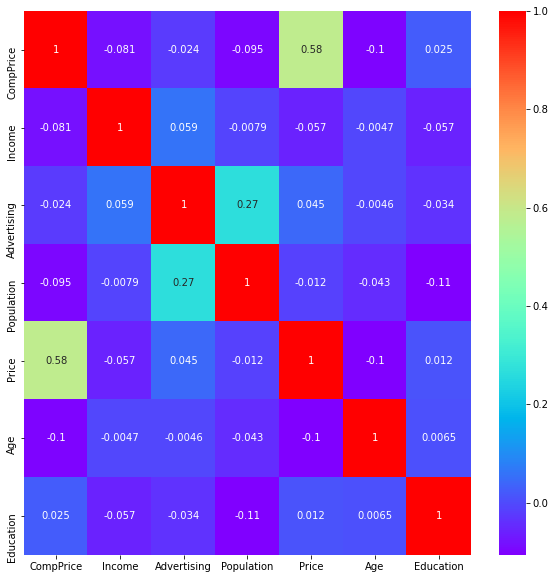

In [10]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot =True, cmap='rainbow')

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
df1 = df[['ShelveLoc', 'Urban', 'US']].apply(le.fit_transform)
df1.head()

,ShelveLoc,Urban,US
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [13]:
df = df.drop(columns={'ShelveLoc', 'Urban', 'US'}, axis=1)

In [14]:
df =pd.concat([df, df1], axis=1, sort=False)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,Average Sale,138,73,11,276,120,42,17,0,1,1
1,High Sale,111,48,16,260,83,65,10,1,1,1
2,High Sale,113,35,10,269,80,59,12,2,1,1
3,Average Sale,117,100,4,466,97,55,14,2,1,1
4,Low Sale,141,64,3,340,128,38,13,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 1:11]
y = df.iloc[:, 0]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [32]:
y_train.value_counts()

Average Sale    193
High Sale        69
Low Sale         58
Name: Sales, dtype: int64

# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=18, n_jobs=3, oob_score=True, criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=18, n_jobs=3,
                       oob_score=True)

In [36]:
pred_train = model.predict(x_train)

In [37]:
metrics.accuracy_score(pred_train,y_train)

1.0

In [38]:
metrics.confusion_matrix(pred_train,y_train)

array([[193,   0,   0],
       [  0,  69,   0],
       [  0,   0,  58]], dtype=int64)

In [39]:
pred_test = model.predict(x_test)

In [40]:
metrics.accuracy_score(pred_test,y_test)

0.7375

In [42]:
dff =pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

dff

,Actual,Predicted
338,Average Sale,Average Sale
398,Average Sale,Average Sale
237,Average Sale,Average Sale
79,Average Sale,Average Sale
371,Average Sale,Average Sale
...,...,...
305,Average Sale,Average Sale
380,Average Sale,Average Sale
77,Average Sale,Average Sale
180,Low Sale,Low Sale


In [43]:
cols = list(df.columns)

In [46]:
predictors = cols[1:11]
target = cols[0]

In [49]:
rf.feature_importances_

array([0.11776017, 0.10237678, 0.09120915, 0.10197588, 0.20145475,
       0.15050498, 0.05985206, 0.12989058, 0.02033576, 0.02463988])

In [50]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi

,feature,importance
4,Price,0.198969
5,Age,0.139209
7,ShelveLoc,0.129259
0,CompPrice,0.124998
1,Income,0.112087
2,Advertising,0.098445
3,Population,0.095254
6,Education,0.066393
9,US,0.020289
8,Urban,0.015096
